In [5]:
import numpy as np

In [6]:
code_distance = 9
error_rate = 180

observations = 70000

dataset = np.load(f'test-datasets/HL_data_{code_distance}_{error_rate}_{observations}.npy')

data = np.array(dataset[:, code_distance**2 *2:code_distance**2 *2+ code_distance**2 *4])
# last 4 columns are the labels

print(data.shape)
print(data[:5])

(70000, 324)
[[0 1 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]]


In [7]:
x_error = data[:, :code_distance**2*2]
z_error = data[:, code_distance**2*2:]


print(f"shapes: {x_error.shape}, {z_error.shape}")



shapes: (70000, 162), (70000, 162)


In [8]:
x_only = x_error
z_only = z_error

x_error = []
z_error = []
xz_error = []

for i in range(observations): # slow as asdfhjkl but i don't care
    xobs = np.zeros(code_distance**2 *2)
    zobs = np.zeros(code_distance**2 *2)
    xzobs = np.zeros(code_distance**2 *2)
    
    thingx = x_only[i]
    thingz = z_only[i]

    for j in range(code_distance**2 *2):
        if thingx[j] == 1  and thingz[j] == 1:
            xzobs[j] = 1
        elif thingx[j] == 1:
            xobs[j] = 1
        elif thingz[j] == 1:
            zobs[j] = 1
    x_error.append(xobs)
    z_error.append(zobs)
    xz_error.append(xzobs)

x_error = np.array(x_error)
z_error = np.array(z_error)
xz_error = np.array(xz_error)



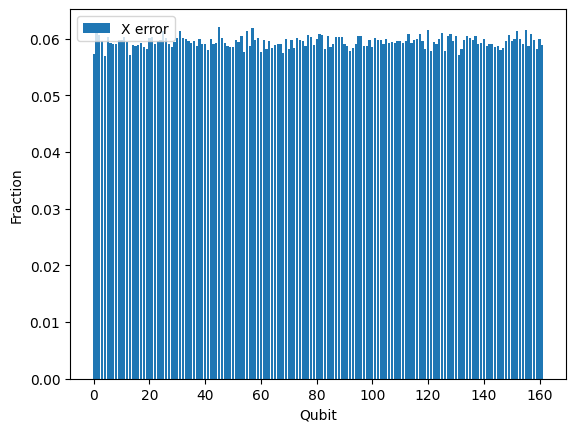

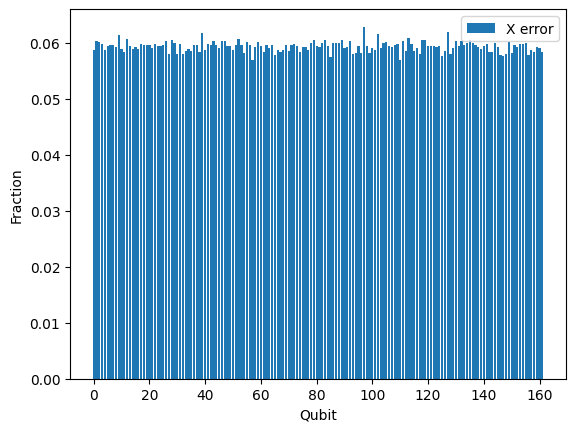

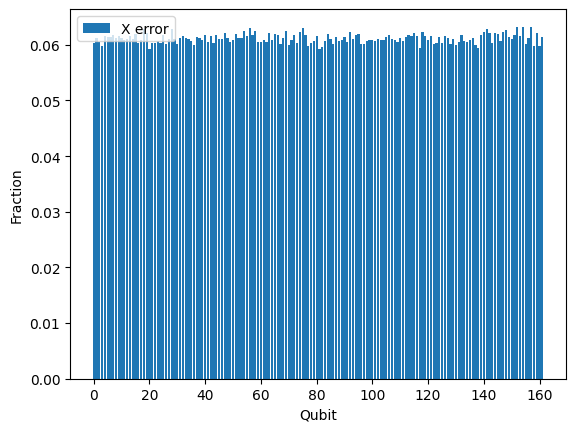

In [9]:
# sum each column
x_error_sum = np.sum(x_error, axis=0)
z_error_sum = np.sum(z_error, axis=0)
xz_error_sum = np.sum(xz_error, axis=0)

# divide by number of observations
x_error_fraction = x_error_sum / observations
z_error_fraction = z_error_sum / observations
xz_error_fraction = xz_error_sum / observations

# plot the fractions as bar plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(range(code_distance**2*2), x_error_fraction, label='X error')
ax.set_xlabel('Qubit')
ax.set_ylabel('Fraction')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.bar(range(code_distance**2*2), z_error_fraction, label='X error')
ax.set_xlabel('Qubit')
ax.set_ylabel('Fraction')
ax.legend()
plt.show()

fig, ax = plt.subplots()
ax.bar(range(code_distance**2*2), xz_error_fraction, label='X error')
ax.set_xlabel('Qubit')
ax.set_ylabel('Fraction')
ax.legend()
plt.show()



In [10]:
# calculate the average error rate
x_error_rate = np.mean(x_error_fraction)
z_error_rate = np.mean(z_error_fraction)
xz_error_rate = np.mean(xz_error_fraction)
print(f"X error rate: {x_error_rate}")
print(f"Z error rate: {z_error_rate}")
print(f"XZ error rate: {xz_error_rate}")
print(f"total error rate: {x_error_rate + z_error_rate + xz_error_rate}")
print(f"{error_rate}")


X error rate: 0.05944726631393298
Z error rate: 0.05935661375661375
XZ error rate: 0.06116675485008818
total error rate: 0.17997063492063492
180
